In [50]:
# For cleaning the data
import pandas as pd
import numpy as np

#For Visualizing the data
import plotly.express as px
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Data Pre-Processing
from sklearn.preprocessing import StandardScaler, OrdinalEncoder, PolynomialFeatures
from sklearn.impute import SimpleImputer

# Model Performance
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
path = '/mnt/batch/tasks/shared/LS_root/mounts/clusters/payyavula19972/code/Users/payyavula1997/Flights_delay_Project/DelayedFlights.csv'
flights_data = pd.read_csv(path)

In [51]:
flights_data.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
1542406,2008,10,27,1,1622.0,1420,NaN,1520,WN,27,...,NaN,19.0,1,A,0,NaN,NaN,NaN,NaN,NaN
1546593,2008,10,25,6,1323.0,1255,NaN,1442,XE,2347,...,NaN,0.0,1,B,0,NaN,NaN,NaN,NaN,NaN
1547161,2008,10,22,3,1825.0,1815,NaN,1927,XE,2819,...,NaN,0.0,1,C,0,NaN,NaN,NaN,NaN,NaN
1547178,2008,10,22,3,1733.0,1715,NaN,1818,XE,2890,...,NaN,0.0,1,B,0,NaN,NaN,NaN,NaN,NaN
1548271,2008,10,15,3,1943.0,1745,NaN,1857,XE,2117,...,NaN,0.0,1,B,0,NaN,NaN,NaN,NaN,NaN


In [52]:
flights_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1266 entries, 1542406 to 688439
Data columns (total 29 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Year               1266 non-null   int64  
 1   Month              1266 non-null   int64  
 2   DayofMonth         1266 non-null   int64  
 3   DayOfWeek          1266 non-null   int64  
 4   DepTime            1266 non-null   float64
 5   CRSDepTime         1266 non-null   int64  
 6   ArrTime            631 non-null    float64
 7   CRSArrTime         1266 non-null   int64  
 8   UniqueCarrier      1266 non-null   object 
 9   FlightNum          1266 non-null   int64  
 10  TailNum            1266 non-null   object 
 11  ActualElapsedTime  630 non-null    float64
 12  CRSElapsedTime     1266 non-null   float64
 13  AirTime            630 non-null    float64
 14  ArrDelay           630 non-null    float64
 15  DepDelay           1266 non-null   float64
 16  Origin          

In [59]:
flights_data.isnull().sum()

Year                   0
Month                  0
DayofMonth             0
DayOfWeek              0
DepTime                0
CRSDepTime             0
ArrTime              635
CRSArrTime             0
UniqueCarrier          0
FlightNum              0
TailNum                0
ActualElapsedTime    636
CRSElapsedTime         0
AirTime              636
ArrDelay             636
DepDelay               0
Origin                 0
Dest                   0
Distance               0
TaxiIn               635
TaxiOut                0
Cancelled              0
CancellationCode       0
Diverted               0
CarrierDelay         869
WeatherDelay         869
NASDelay             869
SecurityDelay        869
LateAircraftDelay    869
dtype: int64

In [3]:
flights_data = flights_data.drop("Unnamed: 0",1)

In [60]:
target = ["Cancelled"]
leaky_features = ["Year", "Diverted", "ArrTime", "ActualElapsedTime", "AirTime", "ActualElapsedTime", "ArrDelay", "TaxiIn", "CarrierDelay", "WeatherDelay", "NASDelay", "SecurityDelay","LateAircraftDelay", "CancellationCode"]
features = [x for x in flights_data.columns if (x != target[0]) & (x not in leaky_features) & (len(flights_data[x].unique().tolist()) > 1)]

In [54]:
flights_data[leaky_features]

,Year,Diverted,ArrTime,ActualElapsedTime,AirTime,ActualElapsedTime,AirTime,ArrDelay,TaxiIn,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,CancellationCode
1542406,2008,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A
1546593,2008,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,B
1547161,2008,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,C
1547178,2008,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,B
1548271,2008,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,B
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1334984,2008,0,2002.0,167.0,147.0,167.0,147.0,18.0,6.0,0.0,0.0,2.0,0.0,16.0,N
690834,2008,0,2333.0,103.0,65.0,103.0,65.0,38.0,6.0,31.0,0.0,7.0,0.0,0.0,N
871058,2008,0,1818.0,189.0,163.0,189.0,163.0,-9.0,7.0,NaN,NaN,NaN,NaN,NaN,N
1141147,2008,0,1320.0,107.0,88.0,107.0,88.0,15.0,4.0,15.0,0.0,0.0,0.0,0.0,N


In [29]:
features

['Month',
 'DayofMonth',
 'DayOfWeek',
 'DepTime',
 'CRSDepTime',
 'CRSArrTime',
 'UniqueCarrier',
 'FlightNum',
 'TailNum',
 'CRSElapsedTime',
 'DepDelay',
 'Origin',
 'Dest',
 'Distance',
 'TaxiOut']

In [5]:
where = flights_data["Month"].isin([10,11,12])
data = flights_data[where]

In [6]:
def get_dtypes(data,features):
    output = {}
    for f in features:
        dtype = str(data[f].dtype)
        if dtype not in output.keys(): output[dtype] = [f]
        else: output[dtype] += [f]
    return output

In [7]:
dtypes = get_dtypes(flights_data,features)

In [8]:
categories = ["Month", "DayOfWeek", "DayofMonth"]
categories += dtypes["object"]
numerics = [i for i in dtypes["int64"] if i not in categories]
numerics += dtypes["float64"]

In [9]:
flights_data[categories].head()

,Month,DayOfWeek,DayofMonth,UniqueCarrier,TailNum,Origin,Dest
0,1,4,3,WN,N712SW,IAD,TPA
1,1,4,3,WN,N772SW,IAD,TPA
2,1,4,3,WN,N428WN,IND,BWI
3,1,4,3,WN,N464WN,IND,BWI
4,1,4,3,WN,N726SW,IND,JAX


In [10]:
flights_data[numerics].head()

,CRSDepTime,CRSArrTime,FlightNum,Distance,DepTime,CRSElapsedTime,DepDelay,TaxiOut
0,1955,2225,335,810,2003.0,150.0,8.0,8.0
1,735,1000,3231,810,754.0,145.0,19.0,10.0
2,620,750,448,515,628.0,90.0,8.0,17.0
3,1755,1925,3920,515,1829.0,90.0,34.0,10.0
4,1915,2110,378,688,1940.0,115.0,25.0,10.0


In [11]:
for numeric in numerics: flights_data[numeric] = flights_data[numeric].fillna(0)

In [12]:
categories.remove("TailNum")

In [14]:
cancelled = flights_data[flights_data[target[0]] == 1]
not_cancelled = flights_data[flights_data[target[0]] == 0]

In [16]:
flights_data = pd.concat([cancelled, not_cancelled.sample(n=len(cancelled))],0)


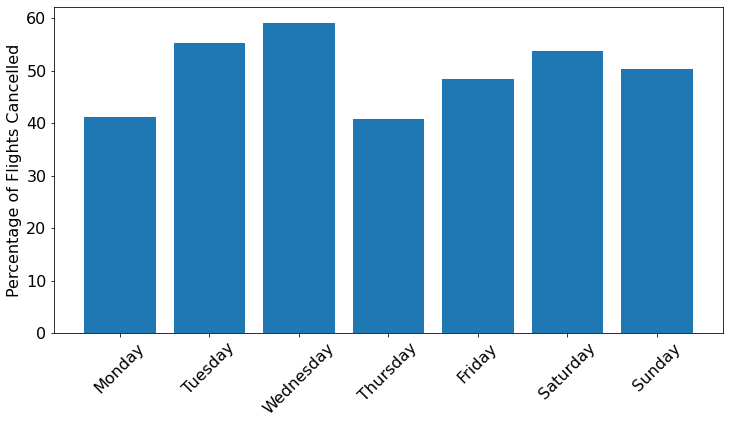

In [32]:
import matplotlib.pyplot as plt

font = {'size'   : 16}
plt.rc('font', **font)

days_cancelled = cancelled['Cancelled'].groupby(flights_data['DayOfWeek']).count()
days_total = flights_data['Cancelled'].groupby(flights_data['DayOfWeek']).count()
days_frac = np.divide(days_cancelled, days_total)
x=days_frac.index.values
week = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

fig, ax = plt.subplots(figsize = (12,6))
ax.bar(x,days_frac*100, align='center')
ax.set_ylabel('Percentage of Flights Cancelled')
ax.set_xticks(x)
ax.set_xticklabels(week, rotation = 45)

plt.show()

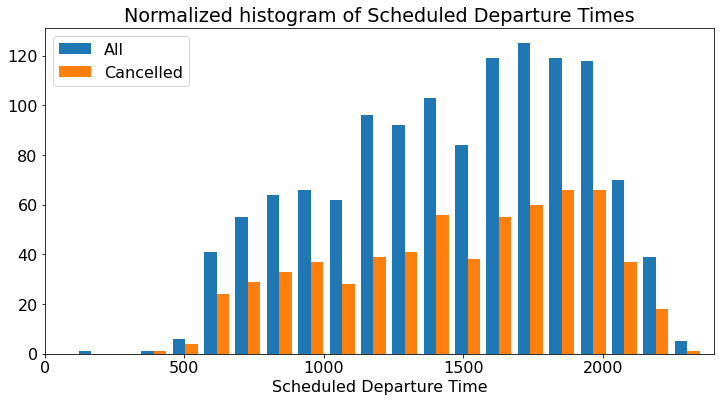

In [35]:
flights_data['CRSDepTime'].head(10)
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize = (12,6))

ax.hist([flights_data['CRSDepTime'], cancelled['CRSDepTime']], bins=20, label=['All', 'Cancelled'])

ax.set_xlim(0,2400)

ax.set_xlabel('Scheduled Departure Time')
ax.set_title('Normalized histogram of Scheduled Departure Times')

plt.legend()
plt.show()

/anaconda/envs/azureml_py38/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3208: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asarray(a).size
/anaconda/envs/azureml_py38/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


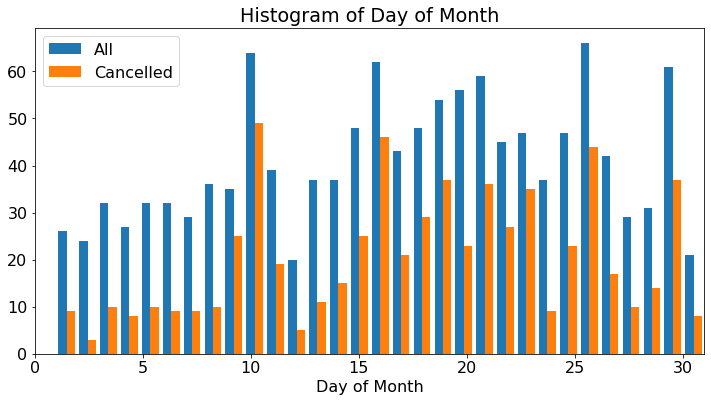

In [42]:
fig, ax = plt.subplots(figsize = (12,6))

ax.hist([flights_data['DayofMonth'], cancelled['DayofMonth']], bins=31, label=['All', 'Cancelled'])

ax.set_xlim(0,31)

ax.set_xlabel('Day of Month')
ax.set_title('Histogram of Day of Month')

plt.legend()
plt.show()

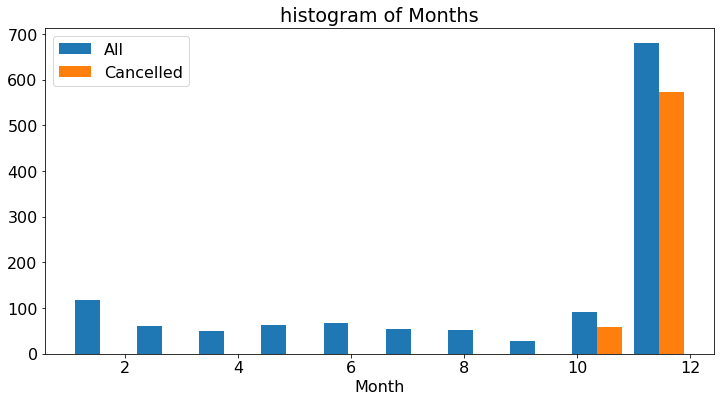

In [45]:
fig, ax = plt.subplots(figsize = (12,6))

ax.hist([flights_data['Month'], cancelled['Month']], label=['All', 'Cancelled'])

ax.set_xlabel('Month')
ax.set_title('histogram of Months')

plt.legend()
plt.show()

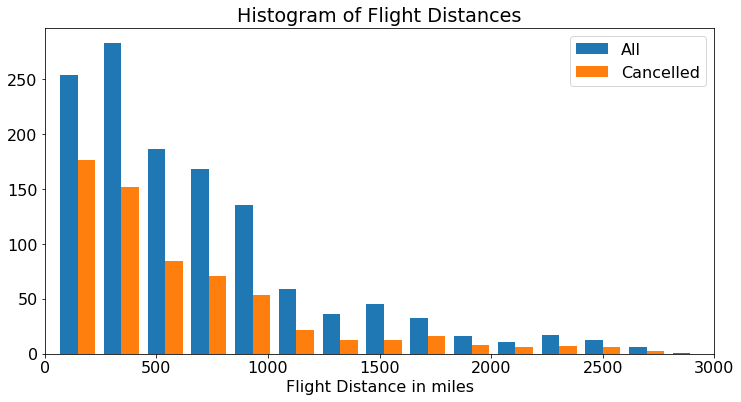

In [48]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize = (12,6))

ax.hist([flights_data['Distance'], cancelled['Distance']], bins=20, label=['All', 'Cancelled'])

ax.set_xlim(0,3000)
ax.set_xlabel('Flight Distance in miles')
ax.set_title('Histogram of Flight Distances')

plt.legend()
plt.show()

In [19]:
one_hot_encoded = pd.get_dummies(flights_data[categories].fillna("Unknown"))
X = pd.concat([one_hot_encoded, flights_data[numerics].fillna(0)],1)
y = flights_data[target[0]]

In [20]:
# Function to get the cross vallidation scores
def get_results(model, X, y):

    import warnings
    with warnings.catch_warnings():
        warnings.simplefilter("ignore")
        from sklearn.model_selection import cross_val_score
        compute = cross_val_score(model, X, y, cv=10)
        mean = compute.mean()
        std = compute.std()
        return mean, std

In [24]:
def display_classifier_results(X,y):

    models = []

    from xgboost import XGBClassifier
    models += [XGBClassifier()]
    
    from sklearn.neighbors import KNeighborsClassifier
    models += [KNeighborsClassifier()]

    from sklearn.naive_bayes import GaussianNB
    models += [GaussianNB()]

    from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
    models += [RandomForestClassifier(), GradientBoostingClassifier()]


    output = {}

    for m in models:
        try:
            model_name = type(m).__name__
            from time import time
            start = time()
            scores = get_results(m,X,y)
            finish = time() - start
            time_finished = "%d minutes %2d seconds" % (int(finish / 60), finish % 60) 
            row = {"Mean Accuracy" : scores[0], "(+/-)" : scores[1], "Processing Time": time_finished}
            output[model_name] = row
        except:
            pass

    from pandas import DataFrame
    from IPython.display import display

    result = DataFrame(data=output).T
    result = result[["Mean Accuracy", "(+/-)", "Processing Time"]]
    display(result.sort_values("Mean Accuracy", ascending=False))


In [25]:
display_classifier_results(X,y)

[03:14:43] WARNING: /mnt/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[03:14:43] WARNING: /mnt/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[03:14:44] WARNING: /mnt/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[03:14:45] WARNING: /mnt/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_me

,Mean Accuracy,(+/-),Processing Time
RandomForestClassifier,0.902143,0.0743131,0 minutes 2 seconds
GradientBoostingClassifier,0.881677,0.136216,0 minutes 5 seconds
XGBClassifier,0.87854,0.13901,0 minutes 7 seconds
GaussianNB,0.65708,0.0862641,0 minutes 0 seconds
KNeighborsClassifier,0.56866,0.0592144,0 minutes 0 seconds
